# Understanding Seaborn

If you're familiar with the `R` language, you know that `ggplot` is a great resource to plot data and interpret it. Similarly, in `Python`, the equivalent library is `matplotlib`. However, the functionality and appearance of the plots using matplotlib are not high and as a result a better alternative is needed. This is where `seaborn` steps in and steals the show.

Let's take a deep dive on the various plots that we can make using `seaborn` and see how easy it is to do so.

## Import data

I'll work with the dataset about **California House Prices** dataset also available on [Kaggle](https://www.kaggle.com/camnugent/california-housing-prices).

In [28]:
import pandas as pd

dataset = pd.read_csv("dataset.csv")

In [29]:
print("Dataset: {}".format(dataset.shape))
print("Columns: {}".format(dataset.columns))
dataset.head(5)

Dataset: (20640, 10)
Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


There are **20640 rows** with **10 columns**. We can leverage the datasets and the valuable information it hides to plot data and infer from it.

## Seaborn library

Let's import the `seaborn` library to get started.

In [34]:
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

### Scatter plot

A scatter plot helps describe a good relation between two quanities. Here, let's see the relation between the number of rooms and the number of bedrooms.

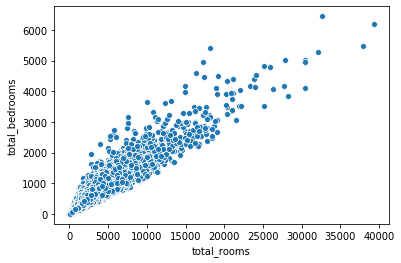

In [39]:
sn.scatterplot(x = 'total_rooms', y = 'total_bedrooms', data = dataset)

We can see an almost linear relationship between `rooms` and `bedrooms`. However, the plot is not very intuitive. Let's make this more informative and descriptive.

Text(0, 0.5, 'Total bedrooms')

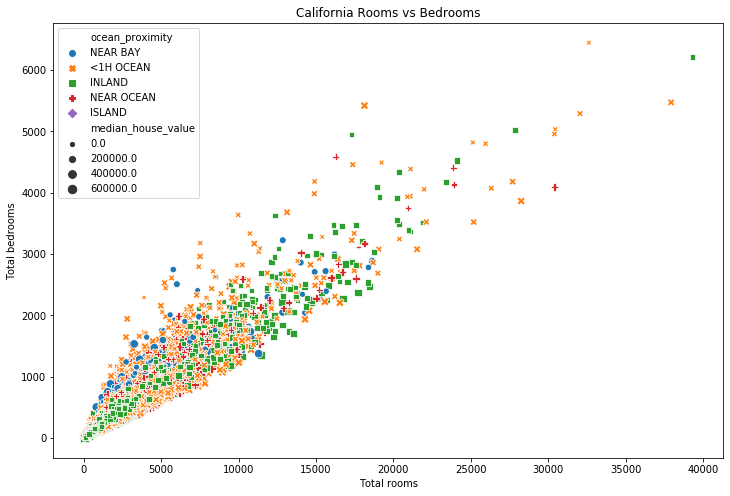

In [52]:
plt.figure(figsize = (12, 8))
sn.scatterplot(data = dataset,
               x = 'total_rooms', 
               y = 'total_bedrooms',
               size = 'median_house_value', 
               hue = 'ocean_proximity', 
               style = 'ocean_proximity')
plt.title("California Rooms vs Bedrooms")
plt.xlabel("Total rooms")
plt.ylabel("Total bedrooms")

As you can see, we improved the plot so much. We added the size of each point based on the `median_house_value` and added a legend for it too. Next, the `hue` provides different colors based on the categorical column defining proximity to the ocean. The same column also helps us to define various markers using `style`.